In [1]:
import os
# import codecs
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

import missingno as msno

Using TensorFlow backend.


In [2]:
df = pd.read_csv('hello.csv', encoding='utf-8')
df.head()

C:\ProgramData\Anaconda3\envs\p36\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,city,district,dong,apart,exclusive_area_m2,price,floor,date,pre-sale_area_m2,moving_date,pre-sale_date,pre-sale_price,house_num,num_for_each_area,price_by3.3m2_exclusive,price_by3.3m2_pre_area,price_by3.3m2_pre_price
0,서울특별시,강남구,압구정동,구현대1차,196.21,"450,000",13,2018.12,211.23,1976.06,NaN,NaN,480,120,"7,582","7,043",NaN
1,서울특별시,강남구,청담동,마크힐스2단지,202.58,"450,000",5,2018.12,252.31,2010.07,2009.05,"600,000",19,1,"7,343","5,896","7,861"
2,서울특별시,강남구,압구정동,신현대,139.83,"320,000",7,2018.12,165.29,1982.04,NaN,NaN,"1,924",168,"7,565","6,400",NaN
3,서울특별시,강남구,대치동,한보미도맨션1차,191.04,"315,000",2,2018.12,219.22,1983.12,NaN,"8,978","1,204",84,"5,451","4,750",135
4,서울특별시,강남구,압구정동,구현대7차,144.20,"304,000",10,2018.12,158.68,1979.05,NaN,NaN,560,168,"6,969","6,333",NaN


In [3]:
# encoding_list = ["df.city", "df.district", "df.dong", "df.apart"]
le = LabelEncoder()
le.fit(df.city)

df['city'] = le.transform(df.city)
df.city.value_counts()

0    970702
1        20
Name: city, dtype: int64

In [4]:
# encoding_list = ["df.city", "df.district", "df.dong", "df.apart"]
le = LabelEncoder()
le.fit(df.district)

df['district'] = le.transform(df.district)
df.district.value_counts()

8     107006
17     61104
0      60273
3      59351
16     51526
1      51185
9      49821
18     48971
6      48583
14     43013
19     40634
15     35619
12     34605
11     33993
4      33848
24     32558
10     30927
21     29541
13     27131
5      20545
2      19671
20     17101
7      16560
23      9941
22      7215
Name: district, dtype: int64

In [5]:
# encoding_list = ["df.city", "df.district", "df.dong", "df.apart"]
le = LabelEncoder()
le.fit(df.dong)

df['dong'] = le.transform(df.dong)
df.dong.value_counts()

128    43015
247    24184
254    23483
173    22579
114    20936
17     17644
89     16110
221    16051
13     13271
236    12966
139    12664
244    12541
165    12105
106    11995
101    11548
161    11545
292    11017
172    10747
273    10485
105    10314
6      10218
156    10112
76     10020
176     9825
196     9771
7       9761
28      9455
53      9255
181     9033
63      9002
       ...  
68        38
272       37
223       36
213       36
66        35
180       34
264       34
242       34
129       32
9         31
16        26
67        20
29        20
203       19
65        19
229       18
121       17
219       17
159       15
241       15
109       14
166       13
218       12
207       10
64        10
71        10
32         5
271        4
291        4
19         3
Name: dong, Length: 303, dtype: int64

In [6]:
# encoding_list = ["df.city", "df.district", "df.dong", "df.apart"]
le = LabelEncoder()
le.fit(df.apart)

df['apart'] = le.transform(df.apart)
df.apart.value_counts()

1910    9042
4226    8845
1704    7880
1056    7585
3489    7498
2520    7384
1895    6607
4097    6158
3499    5915
3500    5850
443     5500
3045    5499
3493    5389
701     4952
4241    4877
2303    4818
774     4505
952     4473
325     4331
232     4177
4244    4084
1545    3992
2705    3924
1963    3832
52      3701
3429    3530
3496    3525
3380    3410
3049    3396
4166    3283
        ... 
4016       1
3439       1
2702       1
1278       1
2067       1
1640       1
1131       1
834        1
2704       1
2925       1
4334       1
580        1
547        1
650        1
3798       1
2832       1
3976       1
3698       1
3670       1
2354       1
644        1
2671       1
3167       1
3972       1
4292       1
4050       1
2949       1
3168       1
2521       1
2155       1
Name: apart, Length: 4471, dtype: int64

In [7]:
# df.head()

In [8]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)
print(df.shape)

(970722, 17)


In [9]:
# with codecs.open('hello.csv', 'r', encoding='utf-8', errors='ignore') as rowdata:
#     df = pd.read_csv(rowdata, sep="\t")

In [10]:
# dataset = df.values
# x = dataset[:, 1:]
# df = pd.DataFrame(x)
# df.tail(20)

In [11]:
list = ['price','pre-sale_price','house_num','num_for_each_area','price_by3.3m2_exclusive','price_by3.3m2_pre_area','price_by3.3m2_pre_price']
for i in list:
    df[i] = df[i].apply(lambda x: str(x).replace(",",""))
    df[i] = df[i].apply(lambda x: x.replace('nan',"0"))
y = df['price']
del df['price']
del df['pre-sale_date']

In [12]:
# df.tail(50)

In [13]:
# for c in df.columns:
#     print('{} : {}'.format(c, len(df.loc[pd.isnull(df[c]),c].values)))
# print(msno.matrix(df))

In [14]:
x_train, x_test,y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=seed)

In [15]:
model = Sequential()
model.add(Dense(240, input_dim=15, activation='relu'))
model.add(Dense(720, activation='relu'))
model.add(Dense(1440, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# print(x_train.tail())
# print(y_train.tail())
# print(x_test.tail())
# print(y_test.tail())

In [17]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
# 모델 저장 조건 설정
modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# loss는 train loss고 val_loss는 validation loss임 / acc도 마찬가지

# 모델 실행 및 저장
history = model.fit(x_train, y_train, validation_split=0.33, epochs=100, batch_size=1500)

In [19]:
history = model.fit(x_train, y_train, validation_split=0.3, epochs=300, batch_size=5000, callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Train on 475653 samples, validate on 203852 samples
Epoch 1/300
475653/475653 [==============================] - 11s 23us/step - loss: 753704069.0116 - acc: 2.9433e-05 - val_loss: 320455229.0143 - val_acc: 5.3961e-05

Epoch 00001: val_loss improved from inf to 320455229.01430, saving model to ./model/01-320455229.0143.hdf5
Epoch 2/300
475653/475653 [==============================] - 9s 18us/step - loss: 253023721.8897 - acc: 6.0969e-05 - val_loss: 171708367.8411 - val_acc: 6.3772e-05

Epoch 00002: val_loss improved from 320455229.01430 to 171708367.84114, saving model to ./model/02-171708367.8411.hdf5
Epoch 3/300
475653/475653 [==============================] - 9s 19us/step - loss: 70720830.4359 - acc: 1.3245e-04 - val_loss: 24143800.3450 - val_acc: 1.6679e-04

Epoch 00003: val_loss improved from 171708367.84114 to 24143800.34496, saving model to ./model/03-24143800.3450.hdf5
Epoch 4/300
475653/475653 [==============================] - 9s


Epoch 00033: val_loss did not improve from 775856.70032
Epoch 34/300
475653/475653 [==============================] - 9s 19us/step - loss: 3323563.5079 - acc: 4.6042e-04 - val_loss: 1693197.2816 - val_acc: 4.8074e-04

Epoch 00034: val_loss did not improve from 775856.70032
Epoch 35/300
475653/475653 [==============================] - 9s 18us/step - loss: 1117323.2664 - acc: 6.5804e-04 - val_loss: 606887.6550 - val_acc: 8.8299e-04

Epoch 00035: val_loss improved from 775856.70032 to 606887.65499, saving model to ./model/35-606887.6550.hdf5
Epoch 36/300
475653/475653 [==============================] - 9s 18us/step - loss: 7754591.0874 - acc: 4.3519e-04 - val_loss: 1206432.8430 - val_acc: 8.1432e-04

Epoch 00036: val_loss did not improve from 606887.65499
Epoch 37/300
475653/475653 [==============================] - 9s 19us/step - loss: 1057902.8176 - acc: 6.4543e-04 - val_loss: 13524833.6347 - val_acc: 9.8110e-06

Epoch 00037: val_loss did not improve from 606887.65499
Epoch 38/300
4756

475653/475653 [==============================] - 9s 18us/step - loss: 1370647.7140 - acc: 5.7605e-04 - val_loss: 347410.5567 - val_acc: 0.0011

Epoch 00070: val_loss did not improve from 328608.84379
Epoch 71/300
475653/475653 [==============================] - 8s 18us/step - loss: 2387177.9331 - acc: 5.7605e-04 - val_loss: 5619608.0037 - val_acc: 4.4150e-05

Epoch 00071: val_loss did not improve from 328608.84379
Epoch 72/300
475653/475653 [==============================] - 9s 18us/step - loss: 709988.2870 - acc: 9.4817e-04 - val_loss: 635278.9758 - val_acc: 5.7885e-04

Epoch 00072: val_loss did not improve from 328608.84379
Epoch 73/300
475653/475653 [==============================] - 9s 18us/step - loss: 2041401.1064 - acc: 4.5832e-04 - val_loss: 541969.4120 - val_acc: 9.3205e-04

Epoch 00073: val_loss did not improve from 328608.84379
Epoch 74/300
475653/475653 [==============================] - 9s 18us/step - loss: 951141.2868 - acc: 7.1481e-04 - val_loss: 532211.0223 - val_acc: 0

475653/475653 [==============================] - 9s 18us/step - loss: 950126.0716 - acc: 6.2020e-04 - val_loss: 9612844.0127 - val_acc: 2.9433e-05

Epoch 00107: val_loss did not improve from 222156.78243
Epoch 108/300
475653/475653 [==============================] - 9s 18us/step - loss: 1587284.5785 - acc: 6.3071e-04 - val_loss: 4743266.5123 - val_acc: 7.3583e-05

Epoch 00108: val_loss did not improve from 222156.78243
Epoch 109/300
475653/475653 [==============================] - 9s 18us/step - loss: 1980154.5439 - acc: 5.1088e-04 - val_loss: 577106.7192 - val_acc: 6.7206e-04

Epoch 00109: val_loss did not improve from 222156.78243
Epoch 110/300
475653/475653 [==============================] - 9s 19us/step - loss: 339270.1490 - acc: 0.0011 - val_loss: 450602.1797 - val_acc: 8.1922e-04

Epoch 00110: val_loss did not improve from 222156.78243
Epoch 111/300
475653/475653 [==============================] - 9s 18us/step - loss: 778596.8839 - acc: 8.2203e-04 - val_loss: 390586.8241 - val_ac

475653/475653 [==============================] - 9s 18us/step - loss: 579037.5805 - acc: 9.8181e-04 - val_loss: 702193.7310 - val_acc: 4.2187e-04

Epoch 00145: val_loss did not improve from 131586.46437
Epoch 146/300
475653/475653 [==============================] - 9s 19us/step - loss: 1989946.4960 - acc: 4.7303e-04 - val_loss: 160742.8265 - val_acc: 0.0018

Epoch 00146: val_loss did not improve from 131586.46437
Epoch 147/300
475653/475653 [==============================] - 9s 18us/step - loss: 249876.7385 - acc: 0.0015 - val_loss: 674817.1871 - val_acc: 1.2264e-04

Epoch 00147: val_loss did not improve from 131586.46437
Epoch 148/300
475653/475653 [==============================] - 9s 18us/step - loss: 274469.1322 - acc: 0.0013 - val_loss: 138893.2884 - val_acc: 0.0015

Epoch 00148: val_loss did not improve from 131586.46437
Epoch 149/300
475653/475653 [==============================] - 9s 18us/step - loss: 888415.5360 - acc: 7.5265e-04 - val_loss: 9657250.2473 - val_acc: 2.4528e-05


475653/475653 [==============================] - 9s 18us/step - loss: 1294696.5801 - acc: 0.0012 - val_loss: 96159.7892 - val_acc: 0.0022

Epoch 00183: val_loss improved from 110052.59089 to 96159.78921, saving model to ./model/183-96159.7892.hdf5
Epoch 184/300
475653/475653 [==============================] - 9s 18us/step - loss: 137435.1463 - acc: 0.0017 - val_loss: 189826.6124 - val_acc: 0.0018

Epoch 00184: val_loss did not improve from 96159.78921
Epoch 185/300
475653/475653 [==============================] - 9s 18us/step - loss: 1281414.6528 - acc: 7.6106e-04 - val_loss: 833008.7304 - val_acc: 4.3169e-04

Epoch 00185: val_loss did not improve from 96159.78921
Epoch 186/300
475653/475653 [==============================] - 9s 18us/step - loss: 726518.6936 - acc: 8.5777e-04 - val_loss: 254481.3073 - val_acc: 0.0016

Epoch 00186: val_loss did not improve from 96159.78921
Epoch 187/300
475653/475653 [==============================] - 9s 18us/step - loss: 206473.9713 - acc: 0.0016 - val

475653/475653 [==============================] - 9s 18us/step - loss: 1028556.7154 - acc: 9.5027e-04 - val_loss: 2490176.7175 - val_acc: 9.8110e-05

Epoch 00221: val_loss did not improve from 80154.40866
Epoch 222/300
475653/475653 [==============================] - 9s 18us/step - loss: 540897.7437 - acc: 0.0010 - val_loss: 116696.4004 - val_acc: 0.0017

Epoch 00222: val_loss did not improve from 80154.40866
Epoch 223/300
475653/475653 [==============================] - 9s 19us/step - loss: 244478.9269 - acc: 0.0013 - val_loss: 147974.8311 - val_acc: 0.0020

Epoch 00223: val_loss did not improve from 80154.40866
Epoch 224/300
475653/475653 [==============================] - 9s 19us/step - loss: 686432.1547 - acc: 8.6408e-04 - val_loss: 813961.3978 - val_acc: 4.4150e-05

Epoch 00224: val_loss did not improve from 80154.40866
Epoch 225/300
475653/475653 [==============================] - 9s 18us/step - loss: 406818.4694 - acc: 9.6078e-04 - val_loss: 304167.7284 - val_acc: 4.6602e-04

Epo

475653/475653 [==============================] - 9s 18us/step - loss: 102232.8144 - acc: 0.0020 - val_loss: 62248.3307 - val_acc: 0.0028

Epoch 00260: val_loss improved from 80154.40866 to 62248.33071, saving model to ./model/260-62248.3307.hdf5
Epoch 261/300
475653/475653 [==============================] - 9s 18us/step - loss: 896272.1373 - acc: 0.0013 - val_loss: 2432768.4686 - val_acc: 3.0905e-04

Epoch 00261: val_loss did not improve from 62248.33071
Epoch 262/300
475653/475653 [==============================] - 9s 18us/step - loss: 673824.9052 - acc: 0.0012 - val_loss: 102447.7162 - val_acc: 0.0020

Epoch 00262: val_loss did not improve from 62248.33071
Epoch 263/300
475653/475653 [==============================] - 9s 19us/step - loss: 83702.6374 - acc: 0.0021 - val_loss: 69504.7647 - val_acc: 0.0028

Epoch 00263: val_loss did not improve from 62248.33071
Epoch 264/300
475653/475653 [==============================] - 9s 19us/step - loss: 161196.3266 - acc: 0.0020 - val_loss: 10651

475653/475653 [==============================] - 9s 18us/step - loss: 1581620.3687 - acc: 0.0011 - val_loss: 84855.7903 - val_acc: 0.0025

Epoch 00298: val_loss did not improve from 55526.14326
Epoch 299/300
475653/475653 [==============================] - 9s 18us/step - loss: 82694.5013 - acc: 0.0023 - val_loss: 189654.6033 - val_acc: 0.0018

Epoch 00299: val_loss did not improve from 55526.14326
Epoch 300/300
475653/475653 [==============================] - 9s 18us/step - loss: 80513.4357 - acc: 0.0024 - val_loss: 103322.2429 - val_acc: 0.0016

Epoch 00300: val_loss did not improve from 55526.14326


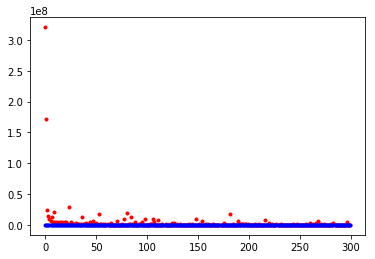

In [20]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파랑색으로, 오차를 빨강색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()

In [21]:
from math import sqrt
from sklearn.metrics import mean_squared_error

modelPred = model.predict(x_test)
RMSE = sqrt(mean_squared_error(y_test, modelPred))
RMSE

305.82693487386206

batch size 10으로 했을 때, 02:31 ~ 07:31 까지 100 epoch 학습함 / 하나당 3분

학습 크기: 493205

근데 2번이랑 100번이랑 loss변화가 없음

* DROP OUT 추가해서 성능 비교 해봐야함
* keras.optimizer.SGD(lr=0.1) 확률적 경사 하강법 learning rate 조절하는 코드
(lr=0.1, momentum=0.9,nestrove=True) 모멘텀을 추가하기도 함 / 한 단계 미리가서 거기서 경사 계산

업데이트 횟수 따라서 더 세밀하게 할지, 더 폭을 넓힐지를 결정함 / 무한대로 커지는거 방지하는것도 있음

최종 아담 코드: keras.optimzers.Adagrad(lr=0.01, epslison=1e-08, decay=0.0 (두 가지 장점 다 취함)

### first try
* LAYER(8,39,24,6,1)
* batch size 100
* learning time per epochs: 20s
* loss: 316,141,761 -> 133,509 꾸준히 줄어듬
* RMSE = <b>393.87</b> (19-04-07)

### second try - add more layers

* LAYER(8,80,160,40,20,5,1)
* batch size 100
* learning time per epochs: 30s
* loss: 107,684,961 -> 86,265 꾸준히 줄어듬, 근데 튀는 범위가 커짐
* RMSE = <b>170.43</b> (19-04-07)

### third try - add dropout(0.5) after input

* LAYER(8,80,dropout(0.5),160,40,20,5,1)
* batch size 100
* learning time per epochs: 25s
* loss: 234,290,290 -> 1,531,823 안 쓰는게 좋은듯  / 100일때 loss :3,629,611
* RMSE = <b>34259.49</b> (19-04-07)

dropout을 20과 5 사이로 옮긴결과 - epoch 100 batch 100일때 loss = 44,634,468 / rmse=33465.05

## 그림그리려고 만듦 
alidation_split=0.33, epochs=50, batch_size=500

조건 위랑 같음 - loss 217190813 / rmse 33871

87198.6413
74763710.7422   

## 그림은 그려지는데 뭔가 잘못됨
뭔가 잘못됨, RMSE 33962
앞에 지역명 잘라내고, validation split이 잘못된건가
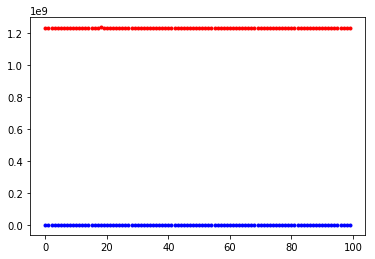

## nan을 0으로 채우니까 동작하긴함 / 나중에 평균값이나 최빈값 등 결측치는 다시 처리해야함
history를 저장 안해서 그림은 안 나왔지만 rmse가 다시 438.52 로 떨어짐

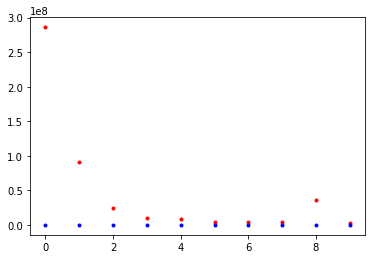
rmse 1538.20 10번만 돌림, split 개수 조정하면 괜찮아질듯

## 0.3 0.3으로 나누고 300번 돌림 / batch 5000 / layer = (15,720,1440,500,250,100,50,25,5,1)
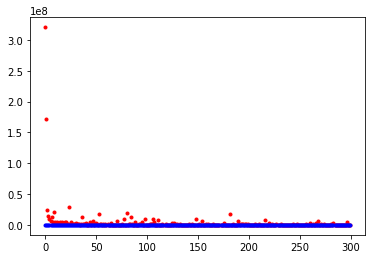

rmse 305.82 /  val_loss did not improve from 55526.14326 - 모델 폴더에 저장됨